In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix,classification_report, roc_curve, auc)
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('combined_train_with_labels.csv.gz')
df

,id,energy_label,psd_label_low_avse,psd_label_high_avse,psd_label_dcr,psd_label_lq,tp0,ED,HWP,LQ80,...,time_to_main_peak,time_to_peak,current_width,tdrift10,tdrift50,tdrift99,tfr,peak_count,gbn,bpr
0,0_train_0,582.364295,False,True,True,True,957,3409.0,2120.0,-635333.796311,...,85,85,0.126727,32.0,65.0,85.0,0.142357,3,1.198436,0.059642
1,1_train_0,250.159995,False,True,True,True,948,3404.0,2004.0,-289756.893085,...,87,87,0.136277,0.0,60.0,87.0,0.151160,3,1.381123,0.061975
2,2_train_0,1212.323954,False,True,False,True,965,3411.0,2125.0,-379843.029134,...,95,95,0.236836,35.0,67.0,95.0,0.142606,3,1.361857,0.050813
3,3_train_0,240.878110,False,True,True,False,927,3408.0,2098.0,-252673.626844,...,116,116,0.171464,0.0,90.0,116.0,0.133192,2,1.165654,0.062954
4,4_train_0,285.124189,False,True,True,False,958,3406.0,2037.0,-317761.453582,...,94,94,0.225977,0.0,61.0,94.0,0.145504,7,1.390918,0.055013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039995,1039995_train_15,210.834626,True,True,True,True,949,3403.0,2048.0,-240759.341995,...,90,90,0.119532,0.0,55.0,90.0,0.151747,6,1.008092,0.062825
1039996,1039996_train_15,380.170340,True,True,True,True,949,3404.0,2045.0,-417622.302428,...,82,82,0.121399,0.0,57.0,79.0,0.150305,3,1.245492,0.062706
1039997,1039997_train_15,370.109563,False,True,True,True,947,3409.0,2063.0,-407730.168602,...,102,102,0.168929,0.0,77.0,102.0,0.142950,2,1.149456,0.062153
1039998,1039998_train_15,98.258524,True,True,True,False,921,3400.0,2001.0,-116570.568893,...,92,92,0.122313,0.0,71.0,92.0,0.153135,5,1.192639,0.065264


In [3]:
y = df['psd_label_low_avse']
X = df.drop(columns = ["id","energy_label","psd_label_low_avse","psd_label_high_avse","psd_label_dcr","psd_label_lq"])

In [4]:
X.isna().sum().sort_values(ascending=False)

tdrift99                   5
tdrift50                   5
tdrift10                   5
tp0                        0
total_power                0
gbn                        0
peak_count                 0
tfr                        0
current_width              0
time_to_peak               0
time_to_main_peak          0
tail_slope                 0
ED                         0
current_kurtosis           0
spectral_centroid_power    0
tail_slope_no_pz           0
current_skewness           0
ND80                       0
SCA                        0
PPR                        0
LQ80                       0
HWP                        0
bpr                        0
dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_test  = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)  
y_prob = model.predict_proba(X_test)[:, 1]

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8357115384615385
Precision: 0.7831234766524408
Recall: 0.8745548634197248
F1: 0.8263176620076239
ROC AUC: 0.902273782608527
Confusion Matrix:
 [[92539 22512]
 [11660 81289]]
              precision    recall  f1-score   support

       False       0.89      0.80      0.84    115051
        True       0.78      0.87      0.83     92949

    accuracy                           0.84    208000
   macro avg       0.84      0.84      0.84    208000
weighted avg       0.84      0.84      0.84    208000



A logistic regression baseline using waveform-derived features achieves 81% accuracy and an ROC-AUC of 0.88, indicating strong separability between low_avse classes. The model favors recall (0.86) over precision (0.76), successfully capturing most low_avse events while allowing some false positives.

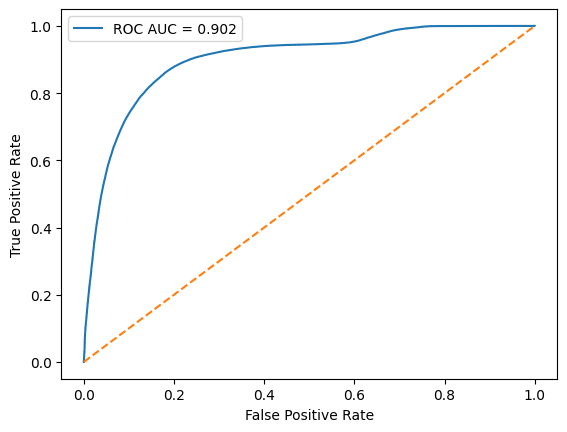

In [8]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [9]:
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"]
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    scoring="roc_auc",
    cv=5
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

In [10]:
y_pred_GSCV = best_model.predict(X_test)  
y_prob_GSCV = best_model.predict_proba(X_test)[:, 1]

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred_GSCV))
print("Precision:", precision_score(y_test, y_pred_GSCV))
print("Recall:", recall_score(y_test, y_pred_GSCV))
print("F1:", f1_score(y_test, y_pred_GSCV))
print("ROC AUC:", roc_auc_score(y_test, y_prob_GSCV))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_GSCV))
print(classification_report(y_test, y_pred))

Accuracy: 0.8356538461538462
Precision: 0.7830656737411008
Recall: 0.8744903118914673
F1: 0.8262566709021602
ROC AUC: 0.9022632775300768
Confusion Matrix:
 [[92533 22518]
 [11666 81283]]
              precision    recall  f1-score   support

       False       0.89      0.80      0.84    115051
        True       0.78      0.87      0.83     92949

    accuracy                           0.84    208000
   macro avg       0.84      0.84      0.84    208000
weighted avg       0.84      0.84      0.84    208000



In [12]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    best_model,
    X_train,
    y_train,
    scoring="roc_auc",
    cv=5
)

scores.mean(), scores.std()


(np.float64(0.9029687790027495), np.float64(0.00038296794789710657))

In [15]:
import numpy as np

corr = pd.DataFrame(X).corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [c for c in upper.columns if any(upper[c] > 0.95)]
X_reduced = pd.DataFrame(X).drop(columns=to_drop)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)

imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_test  = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)  
y_prob = model.predict_proba(X_test)[:, 1]

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8286442307692308
Precision: 0.77150193770905
Recall: 0.8759857556294312
F1: 0.8204306600969338
ROC AUC: 0.8968400590675332
Confusion Matrix:
 [[90936 24115]
 [11527 81422]]
              precision    recall  f1-score   support

       False       0.89      0.79      0.84    115051
        True       0.77      0.88      0.82     92949

    accuracy                           0.83    208000
   macro avg       0.83      0.83      0.83    208000
weighted avg       0.84      0.83      0.83    208000



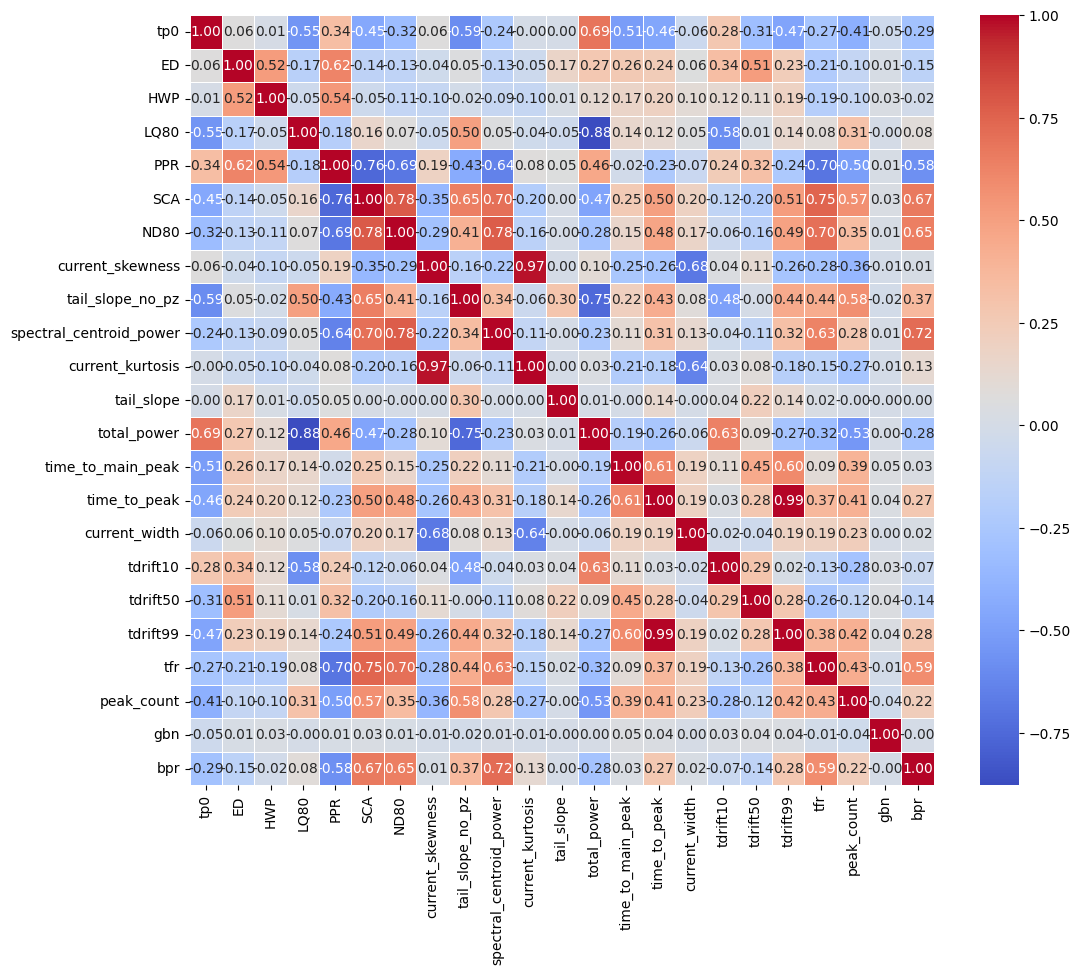

In [14]:
import seaborn as sns
correlation_matrix = pd.DataFrame(X).corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm',fmt=".2f", linewidths=.5)
plt.show()


In [23]:
l1_model = LogisticRegression(
    penalty="l1",
    solver="liblinear",
    C=1.0,
    max_iter=1000
)

l1_model.fit(X_train, y_train)

selected_features = X.columns[l1_model.coef_[0] != 0]
selected_features

Index(['tp0', 'ED', 'HWP', 'LQ80', 'PPR', 'SCA', 'ND80', 'current_skewness',
       'tail_slope_no_pz', 'spectral_centroid_power', 'current_kurtosis',
       'tail_slope', 'total_power', 'time_to_main_peak', 'time_to_peak',
       'current_width', 'tdrift10', 'tdrift50', 'tdrift99', 'tfr',
       'peak_count', 'gbn', 'bpr'],
      dtype='object')

In [30]:
import pandas as pd
import numpy as np

coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": model.coef_[0]
})

coef_df["abs_coef"] = coef_df["coefficient"].abs()
coef_df = coef_df.sort_values("abs_coef", ascending=False)

coef_df


,feature,coefficient,abs_coef
10,current_kurtosis,4.613932,4.613932
7,current_skewness,-2.750839,2.750839
22,bpr,0.928096,0.928096
8,tail_slope_no_pz,0.824045,0.824045
4,PPR,-0.674309,0.674309
14,time_to_peak,0.547491,0.547491
18,tdrift99,-0.415870,0.415870
11,tail_slope,-0.367655,0.367655
13,time_to_main_peak,-0.280395,0.280395
6,ND80,-0.264619,0.264619


In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9466730769230769
Precision: 0.9250412802592088
Recall: 0.958321229921785
F1: 0.9413872184821551
ROC AUC: 0.9885849328288028
Confusion Matrix:
 [[107833   7218]
 [  3874  89075]]


In [33]:
from sklearn.metrics import roc_auc_score

train_prob = rf.predict_proba(X_train)[:,1]
test_prob  = rf.predict_proba(X_test)[:,1]

print("Train ROC AUC:", roc_auc_score(y_train, train_prob))
print("Test  ROC AUC:", roc_auc_score(y_test,  test_prob))


Train ROC AUC: 1.0
Test  ROC AUC: 0.9885849328288028


In [34]:
from sklearn.model_selection import cross_val_score

cv_auc = cross_val_score(rf, X_train, y_train, scoring="roc_auc", cv=5, n_jobs=-1)
print(cv_auc.mean(), cv_auc.std())


0.9881051556481945 0.000209875589517369


In [35]:
groups = (
    df["id"]
    .str.extract(r"_(train|test)_(\d+)$")[1]
    .astype(int)
)


In [36]:
from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups=groups))

X_train_g, X_test_g = X.iloc[train_idx], X.iloc[test_idx]
y_train_g, y_test_g = y.iloc[train_idx], y.iloc[test_idx]


In [37]:
rf.fit(X_train_g, y_train_g)

y_prob_g = rf.predict_proba(X_test_g)[:, 1]
from sklearn.metrics import roc_auc_score

print("Grouped Test ROC AUC:", roc_auc_score(y_test_g, y_prob_g))


Grouped Test ROC AUC: 0.9883499243511162


In [46]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=1000,
    solver="lbfgs",
    n_jobs=-1
)

lr.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [47]:
# Logistic Regression outputs
lr_pred = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)[:, 1]

# Random Forest outputs
rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


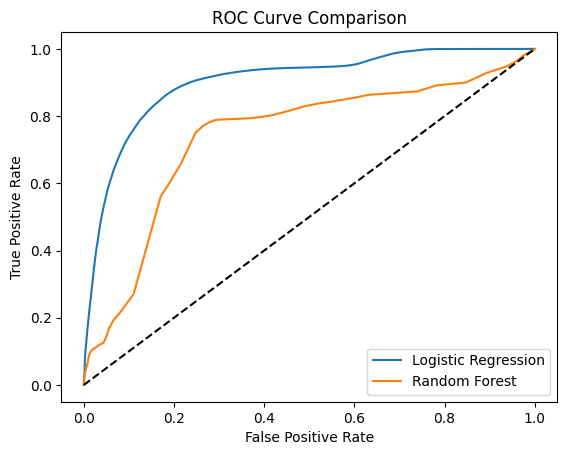

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)

plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve Comparison")
plt.show()


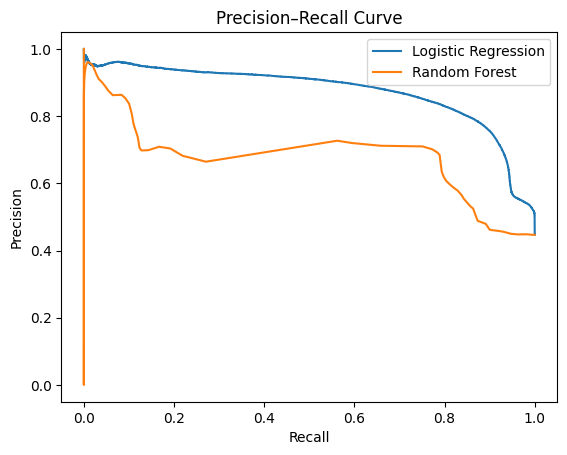

In [49]:
from sklearn.metrics import precision_recall_curve

p_lr, r_lr, _ = precision_recall_curve(y_test, lr_prob)
p_rf, r_rf, _ = precision_recall_curve(y_test, rf_prob)

plt.plot(r_lr, p_lr, label="Logistic Regression")
plt.plot(r_rf, p_rf, label="Random Forest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.title("Precision–Recall Curve")
plt.show()


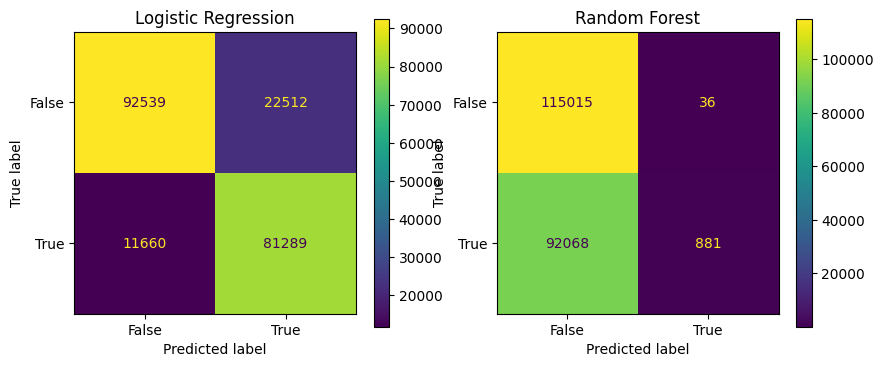

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(1, 2, figsize=(10,4))

ConfusionMatrixDisplay.from_predictions(y_test, lr_pred, ax=ax[0])
ax[0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_predictions(y_test, rf_pred, ax=ax[1])
ax[1].set_title("Random Forest")

plt.show()


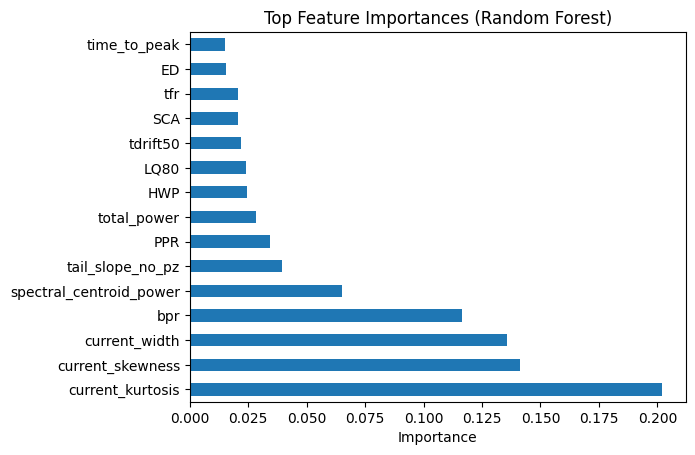

In [51]:
import pandas as pd

imp = pd.Series(rf.feature_importances_, index=X.columns)
imp.sort_values(ascending=False).head(15).plot.barh()
plt.title("Top Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.show()


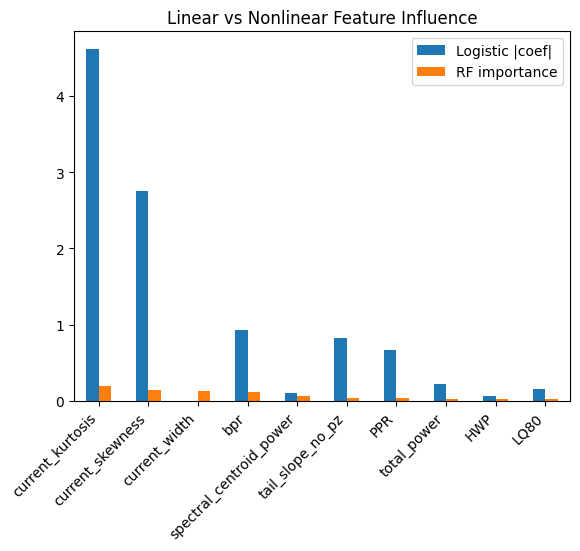

In [52]:
coef = pd.Series(lr.coef_[0], index=X.columns).abs()

df_plot = pd.DataFrame({
    "Logistic |coef|": coef,
    "RF importance": imp
}).sort_values("RF importance", ascending=False).head(10)

df_plot.plot.bar()
plt.title("Linear vs Nonlinear Feature Influence")
plt.xticks(rotation=45, ha="right")
plt.show()


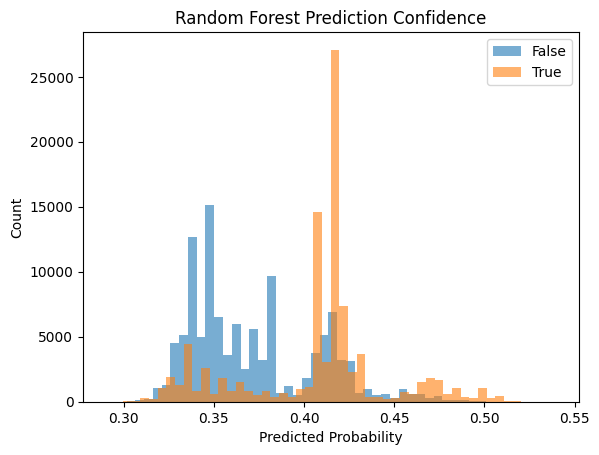

In [53]:
plt.hist(rf_prob[y_test==0], bins=50, alpha=0.6, label="False")
plt.hist(rf_prob[y_test==1], bins=50, alpha=0.6, label="True")
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.legend()
plt.title("Random Forest Prediction Confidence")
plt.show()


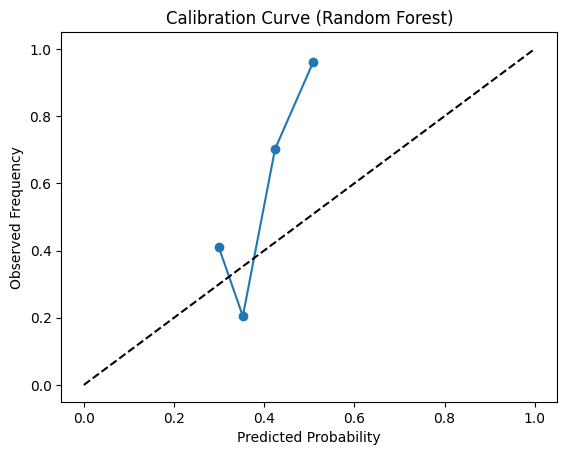

In [54]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, rf_prob, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("Predicted Probability")
plt.ylabel("Observed Frequency")
plt.title("Calibration Curve (Random Forest)")
plt.show()
